# Crafting movies with impact 

Author: Lydia Masabarakiza

## Overview 
This projects analysis different data sets from popular sites to gain insights on which movies the new microsoft studio should create. Microsoft can use the insights generated from this project to understand which movies to produce.

## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. 
Using the data from popular sites such as IMDB, The Numbers, and Rotten Tomates I am going to do an analysis on the data sets and gain actionable insights to give the CEO of Microsoft studio.

## Data Understanding 
The data sets contain different information about movies including but not limited to genre, box office, publisher and director. Having this information I will be able to perform analysis and gain actionable insights.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1 Data sets 

   I chose to use 5 different data sets from three sources. 
   I used the data sets from Rotten tomatoes, IMDB and Numbers site

## 1.1 Uploading the Rotten Tomatoes data set

The rotten tomatoes data set is in form of a tsv file. I will be converting it into a csv file.

In [2]:
#Converting the tsv files into csv files
# Reading the TSV file with 'latin1' encoding
df1 = pd.read_csv(r'C:\Users\lydia\Desktop\rt.reviews.tsv', sep='\t', encoding='latin1')

# Saving the file as CSV
csv_file_path = 'Output_file.csv'
df1.to_csv(csv_file_path, index=False)

In [3]:
#Viewing the first few observations
df1.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [5]:
# Reading TSV file with 'latin1' encoding
df2 = pd.read_csv(r'C:\Users\lydia\Desktop\rt.movie_info.tsv', sep='\t', encoding='latin1')

# Saving the file as CSV
csv_file_path = 'output_file.csv'
df2.to_csv(csv_file_path, index=False)

In [6]:
# Viewing the first few observations
df2.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## 1.2 Merging the two data sets

In [8]:
#using the pd.merge to merge the datasets
# using the outer join method and join on id
merged_df1 = pd.merge(df1, df2, on='id', how='outer')
merged_df1.head()

,id,review,rating_x,fresh,critic,top_critic,publisher,date,synopsis,rating_y,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0.0,Patrick Nabarro,"November 10, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0.0,io9.com,"May 23, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0.0,Stream on Demand,"January 4, 2018","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0.0,MUBI,"November 16, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0.0,Cinema Scope,"October 12, 2017","New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [9]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54857 entries, 0 to 54856
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            54857 non-null  int64  
 1   review        48869 non-null  object 
 2   rating_x      40915 non-null  object 
 3   fresh         54432 non-null  object 
 4   critic        51710 non-null  object 
 5   top_critic    54432 non-null  float64
 6   publisher     54123 non-null  object 
 7   date          54432 non-null  object 
 8   synopsis      54680 non-null  object 
 9   rating_y      54769 non-null  object 
 10  genre         54764 non-null  object 
 11  director      49339 non-null  object 
 12  writer        45426 non-null  object 
 13  theater_date  53411 non-null  object 
 14  dvd_date      53411 non-null  object 
 15  currency      33351 non-null  object 
 16  box_office    33351 non-null  object 
 17  runtime       54001 non-null  object 
 18  studio        40204 non-nu

## 1.3 Cleaning the merged data set.

In [10]:
# Checking the shape of the data before dropping columns that I do not need
merged_df1.shape

(54857, 19)

Before dropping columns I don't need there are 54,857 rows and 19 columns.

In [11]:
# Selecting the columns that I do not need and dropping them
columns_to_drop = ['review', 'critic', 'top_critic', 'date', 'synopsis', 'dvd_date', 'currency','runtime']

# Dropping the selected columns
merged_df1.drop(columns = columns_to_drop, inplace = True)
merged_df1.head()

,id,rating_x,fresh,publisher,rating_y,genre,director,writer,theater_date,box_office,studio
0,3,3/5,fresh,Patrick Nabarro,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
1,3,NaN,rotten,io9.com,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
2,3,NaN,fresh,Stream on Demand,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
3,3,NaN,fresh,MUBI,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
4,3,NaN,fresh,Cinema Scope,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One


In [12]:
# Checking the shape after dropping columns
merged_df1.shape

(54857, 11)

The columns that I do not need have been removed.

Before removing the columns there were 19 columns and now there 11 columns.

In [13]:
# Checking for missing values
merged_df1.isna().sum()

id                  0
rating_x        13942
fresh             425
publisher         734
rating_y           88
genre              93
director         5518
writer           9431
theater_date     1446
box_office      21506
studio          14653
dtype: int64

All the columns have missing values except from the id column.

Before I start handling missing values I want to check for duplicates and drop if there are any.

### 1.3a Dropping duplicates

In [14]:
# Checking for duplicates
merged_df1.duplicated().sum()

792

There are 792 duplicates in the data set.

In [15]:
# Dropping the duplicates
merged_df1.drop_duplicates()

,id,rating_x,fresh,publisher,rating_y,genre,director,writer,theater_date,box_office,studio
0,3,3/5,fresh,Patrick Nabarro,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
1,3,NaN,rotten,io9.com,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
2,3,NaN,fresh,Stream on Demand,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
3,3,NaN,fresh,MUBI,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
4,3,NaN,fresh,Cinema Scope,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","600,000",Entertainment One
...,...,...,...,...,...,...,...,...,...,...,...
54852,1983,NaN,NaN,NaN,G,Action and Adventure|Animation|Kids and Family,Burny Mattinson|Ron Clements|John Musker|Dave ...,NaN,"Jul 2, 1986",NaN,NaN
54853,1985,NaN,NaN,NaN,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","59,371",IDP Distribution
54854,1988,NaN,NaN,NaN,R,Comedy,Les Rose,NaN,NaN,NaN,NaN
54855,1989,NaN,NaN,NaN,NR,Art House and International|Drama,NaN,NaN,NaN,NaN,NaN


The number of rows has reduced from 54,857 to 54,065. This shows that duplicates have been removed.

In [16]:
# Checking the missing values after dropping duplicates
merged_df1.isna().sum()

id                  0
rating_x        13942
fresh             425
publisher         734
rating_y           88
genre              93
director         5518
writer           9431
theater_date     1446
box_office      21506
studio          14653
dtype: int64

The number of missing values have not changed after dropping duplicates.

None of the duplicates had missing values.

### 1.3b Handling missing values

I decided to drop the rows with missing values in the box office column

In [17]:
# Dropping the missing values in the box office column.
merged_df1.dropna(subset=['box_office'], inplace=True)

In [18]:
# Checking the missing values after dropping the rows with missing values in the currency column.
merged_df1.isna().sum()

id                 0
rating_x        7813
fresh             41
publisher        247
rating_y           0
genre              0
director        3946
writer          5685
theater_date     114
box_office         0
studio          2346
dtype: int64

The missing values have reduced in all the columns and some have had all the missing values removed

In [19]:
# There are only 41 missing values in the fresh column so i decided to drop them.
merged_df1.dropna(subset=['fresh'], inplace=True)

In [20]:
merged_df1.isna().sum()

id                 0
rating_x        7772
fresh              0
publisher        206
rating_y           0
genre              0
director        3942
writer          5676
theater_date     111
box_office         0
studio          2343
dtype: int64

In [21]:
#Replacing the NAs in the director, writer, studio and theater data column with the word unknown
merged_df1['director'].fillna('unknown', inplace=True)
merged_df1['writer'].fillna('unknown', inplace=True)
merged_df1['studio'].fillna('unknown', inplace=True)
merged_df1['theater_date'].fillna('unknown', inplace=True)
merged_df1['publisher'].fillna('unknown', inplace=True)

In [22]:
# Replacing the missing values of the rating_x column with 0 which will represent that the movie was n0t given a rating.
merged_df1['rating_x'].fillna(0, inplace=True)

In [23]:
# Checking if there are any missing values after cleaning
merged_df1.isna().sum()

id              0
rating_x        0
fresh           0
publisher       0
rating_y        0
genre           0
director        0
writer          0
theater_date    0
box_office      0
studio          0
dtype: int64

All the missing values have been removed

### 1.3c Data inconsistencies 

In [24]:
# checking for unique values in the numeric columns
merged_df1['rating_x'].unique()

array(['3/5', 0, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', '6',
       'C+', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '3', 'A+', 'A',
       '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10', '3.7/5', '8.4/10',
       '9', '1', '7.2/10', '2.2/5', '0/5', '0.5/10', '5.0/5', '8.5/10',
       '3.0/5', '7', '3.0/4', '2.3/10', '4.5/10', '3.5', '8.6/10', 'D-',
       '2.0/4', '2.7', '4.2/10', '5.8', '2/10', '5', '0.5/5', '4',
       '7.1/10', '5/4', 'N', '3.5/10', '5.8/10', '1/10', 'R', '4.0/5',
       '0/10', '5.0/10', '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10',
       '1.5', '1.5/10', '2.3/4', '8.8/10', '4.0/10', '2.2', '3.8/10',
       '6.8/10', '7.3', '7.0/10', '4/6', '7.6/10', '8.1/10', '3.6/5',
       '2/6', '7.7/10', '1.8', '8.9/10', '8.9', '8.2/10', '8.3/10',
     

There are a lot of inconsistencies in the rating_x column. Some of the reviews have letters and they arent out of the same value.

I will start by converting the letters into into ratings out of 5.

In [25]:
grade_mapping = {
    'A+': 5/5, 'A': 4.5/5, 'A-': 4.7/5,
    'B+': 4/5, 'B': 3.5/5, 'B-': 3.7/5,
    'C+': 3/5, 'C': 2.5/5, 'C-': 2.7/5,
    'D+': 2/5, 'D': 1.5/5, 'D-': 1.7/5,
    'F+': 1/5, 'F': 0.5/5
}

# Custom function to apply the mapping
def convert_review_to_numeric(review):
    return grade_mapping.get(review, review)

# Apply the custom function to the 'reviews' column
merged_df1['rating_x'] = merged_df1['rating_x'].apply(convert_review_to_numeric)

In [26]:
merged_df1['rating_x'].unique()

array(['3/5', 0, 0.5, '2/5', 0.74, '2/4', 0.7, '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10',
       0.9400000000000001, '5/5', 0.1, '3.5/4', 0.4, '1.5/4', '3.5/5',
       '8/10', 0.8, '9/10', '2.5/5', '7.5/10', '5.5/10', 0.54, '1.5/5',
       '1/5', '5/10', '6', 0.6, '0.5/4', 0.3, '3.1/5', '3/6', '4.5/5',
       '0/4', '3', 1.0, 0.9, '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0/5', '0.5/10',
       '5.0/5', '8.5/10', '3.0/5', '7', '3.0/4', '2.3/10', '4.5/10',
       '3.5', '8.6/10', 0.33999999999999997, '2.0/4', '2.7', '4.2/10',
       '5.8', '2/10', '5', '0.5/5', '4', '7.1/10', '5/4', 'N', '3.5/10',
       '5.8/10', '1/10', 'R', '4.0/5', '0/10', '5.0/10', '5.9/10',
       '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '1.5/10', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '4/6', '7.6/10', '8.1/10', '3.6/5', '2/6', '7.7/10', '1.8',
       '8.9/10', 

All the letters have been converted except R and N. 
I do not know how to classify them so I will convert them to NAs and drop them. 
There is another value that is '1-5' i will also convert this to NA and drop it.

In [27]:
# Replace 'R', 'N', and '1-5' with NaN in the 'reviews' column
merged_df1['rating_x'] = merged_df1['rating_x'].replace(['R', 'N', '1-5'], np.nan)

# Drop rows with NaN values in the 'reviews' column
merged_df1 = merged_df1.dropna(subset=['rating_x'])

In [28]:
merged_df1['rating_x'].unique()

array(['3/5', 0, 0.5, '2/5', 0.74, '2/4', 0.7, '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10',
       0.9400000000000001, '5/5', 0.1, '3.5/4', 0.4, '1.5/4', '3.5/5',
       '8/10', 0.8, '9/10', '2.5/5', '7.5/10', '5.5/10', 0.54, '1.5/5',
       '1/5', '5/10', '6', 0.6, '0.5/4', 0.3, '3.1/5', '3/6', '4.5/5',
       '0/4', '3', 1.0, 0.9, '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0/5', '0.5/10',
       '5.0/5', '8.5/10', '3.0/5', '7', '3.0/4', '2.3/10', '4.5/10',
       '3.5', '8.6/10', 0.33999999999999997, '2.0/4', '2.7', '4.2/10',
       '5.8', '2/10', '5', '0.5/5', '4', '7.1/10', '5/4', '3.5/10',
       '5.8/10', '1/10', '4.0/5', '0/10', '5.0/10', '5.9/10', '2.4/5',
       '1.9/5', '4.9', '7.4/10', '1.5', '1.5/10', '2.3/4', '8.8/10',
       '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '4/6',
       '7.6/10', '8.1/10', '3.6/5', '2/6', '7.7/10', '1.8', '8.9/10',
       '8.9', '8.

The output shows that the R, N and 1-5 have been removed.

Next I want to standardize the rating column so that all the values are out of 5.

Before standerdizing I want to convert 3 1/2 into 7/2

In [29]:
selected_rows = merged_df1[merged_df1['rating_x'] == '3 1/2']

# Replace the space with a '+' and evaluate the expression
if not selected_rows.empty:
    index_to_replace = selected_rows.index[0]
    merged_df1.loc[index_to_replace, 'rating_x'] = eval(selected_rows['rating_x'].iloc[0].replace(' ', '+'))

merged_df1['rating_x'].unique()

array(['3/5', 0, 0.5, '2/5', 0.74, '2/4', 0.7, '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10',
       0.9400000000000001, '5/5', 0.1, '3.5/4', 0.4, '1.5/4', '3.5/5',
       '8/10', 0.8, '9/10', '2.5/5', '7.5/10', '5.5/10', 0.54, '1.5/5',
       '1/5', '5/10', '6', 0.6, '0.5/4', 0.3, '3.1/5', '3/6', '4.5/5',
       '0/4', '3', 1.0, 0.9, '4.0/4', '9.5/10', '2.5', '2.1/2', '6.5/10',
       '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5', '0/5', '0.5/10',
       '5.0/5', '8.5/10', '3.0/5', '7', '3.0/4', '2.3/10', '4.5/10',
       '3.5', '8.6/10', 0.33999999999999997, '2.0/4', '2.7', '4.2/10',
       '5.8', '2/10', '5', '0.5/5', '4', '7.1/10', '5/4', '3.5/10',
       '5.8/10', '1/10', '4.0/5', '0/10', '5.0/10', '5.9/10', '2.4/5',
       '1.9/5', '4.9', '7.4/10', '1.5', '1.5/10', '2.3/4', '8.8/10',
       '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10', '4/6',
       '7.6/10', '8.1/10', '3.6/5', '2/6', '7.7/10', '1.8', '8.9/10',
       '8.9', '8.

In [30]:
#Creating a function to standerdize
def convert_to_numeric(value):
    if '/' in str(value):
        numerator, denominator = map(float, str(value).split('/'))
        return (numerator / denominator) * 5
    elif ' ' in str(value):
        whole, fraction = map(float, str(value).split())
        return whole + fraction
    elif isinstance(value, (int, float)):
        return value
    else:
        return np.nan

# Apply the conversion function to the 'ratings' column
merged_df1['rating_x'] = merged_df1['rating_x'].apply(convert_to_numeric)

In [31]:
merged_df1['rating_x'].unique()

array([3.        , 0.        , 0.5       , 2.        , 0.74      ,
       2.5       , 0.7       , 3.75      , 4.        , 5.        ,
       1.25      ,        nan, 3.125     , 1.5       , 3.5       ,
       0.94      , 0.1       , 4.375     , 0.4       , 1.875     ,
       0.8       , 4.5       , 2.75      , 0.54      , 1.        ,
       0.6       , 0.625     , 0.3       , 3.1       , 0.9       ,
       4.75      , 5.25      , 3.25      , 3.7       , 4.2       ,
       3.6       , 2.2       , 0.25      , 4.25      , 1.15      ,
       2.25      , 4.3       , 0.34      , 2.1       , 3.55      ,
       6.25      , 1.75      , 2.9       , 2.95      , 2.4       ,
       1.9       , 0.75      , 2.875     , 4.4       , 3.4       ,
       3.33333333, 3.8       , 4.05      , 1.66666667, 3.85      ,
       4.45      , 4.1       , 4.15      , 2.16666667, 0.2       ,
       3.95      , 4.35      , 4.8       , 4.6       , 0.83333333,
       3.3       , 1.6       , 4.16666667, 2.7       , 2.45   

In [32]:
merged_df1['rating_x'].isna().sum()

378

There are 378 missing values. 
The whole number value were converted to NAs in the process.

In [33]:
merged_df1 = merged_df1.dropna(subset=['rating_x'])

In [34]:
merged_df1['rating_x'].isna().sum()

0

In [35]:
#Checking the unique in box office 
merged_df1['box_office'].unique()

array(['600,000', '41,032,915', '224,114', '134,904', '99,165,609',
       '20,518,224', '1,971,135', '312,136', '201,010', '132,088,910',
       '54,100,000', '127,706,877', '35,565,975', '4,806,750',
       '5,051,927', '93,300,000', '1,000,000', '42,929,971', '13,248,477',
       '64,001,297', '37,431,431', '22,715,908', '67,771,442',
       '19,755,422', '73,023,275', '4,007,792', '1,626,289', '3,998,889',
       '12,533,911', '2,839,256', '128,579,698', '5,205,343',
       '21,318,194', '8,518,148', '12,583,510', '35,000,629', '976,847',
       '37,331,031', '145,778', '63,400,000', '7,009,668', '80,574,010',
       '47,781,388', '5,600,000', '134,455,175', '25,957,696', '200,000',
       '308,164', '32,741,596', '15,986,272', '13,710,572', '4,756,532',
       '42,194,060', '7,366,736', '8,134,217', '72,266,306', '419,361',
       '1,341,151', '2,839,456', '121,500,000', '154,485,963',
       '24,967,943', '46,982,632', '55,400,000', '2,536,460',
       '39,697,363', '140,901', '2

There aren't any inconsistent values in the column

### 1.3d Conversion of data types

In [36]:
#Checking data types
merged_df1.dtypes

id                int64
rating_x        float64
fresh            object
publisher        object
rating_y         object
genre            object
director         object
writer           object
theater_date     object
box_office       object
studio           object
dtype: object

Box office contains figuers but the data type is object.

I am going to convert it to a float

In [37]:
merged_df1['box_office'] = merged_df1['box_office'].replace(',', '', regex=True).astype(float)

In [38]:
merged_df1.dtypes

id                int64
rating_x        float64
fresh            object
publisher        object
rating_y         object
genre            object
director         object
writer           object
theater_date     object
box_office      float64
studio           object
dtype: object

The data set has been cleaned

## 1.4 IMDB data set 

Next I will be working on the data sets from IMDB.

From IMDB I am using the title dataset and their ratings.

In [39]:
# Loading the datasets
df3 = pd.read_csv('C:\\Users\\lydia\\Desktop\\title.akas.csv')
df3.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331702 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [41]:
df4 = pd.read_csv('C:\\Users\\lydia\\Desktop\\title.ratings.csv')
df4.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [42]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [43]:
# Renaming the id column 
df4 = df4.rename(columns={'tconst': 'title_id'})

## 1.5 Merging the datasets

In [44]:
#using the pd.merge to merge the datasets
# using the outer join methode and join on id
merged_df2 = pd.merge(df3, df4, on='title_id', how='outer')
merged_df2.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title,averagerating,numvotes
0,tt0369610,10.0,Джурасик свят,BG,bg,NaN,NaN,0.0,7.0,539338.0
1,tt0369610,11.0,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0,7.0,539338.0
2,tt0369610,12.0,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0
3,tt0369610,13.0,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0,7.0,539338.0
4,tt0369610,14.0,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0,7.0,539338.0


## 1.6 Cleaning the IMDB data set

### 1.6a Dropping columns

In [45]:
#Selecting columns to drop
columns_to_drop = ['ordering','is_original_title']

# Drop the specified columns
merged_df2.drop(columns = columns_to_drop, inplace = True)
merged_df2.head()

,title_id,title,region,language,types,attributes,averagerating,numvotes
0,tt0369610,Джурасик свят,BG,bg,NaN,NaN,7.0,539338.0
1,tt0369610,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,7.0,539338.0
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,7.0,539338.0
3,tt0369610,O Mundo dos Dinossauros,BR,NaN,NaN,short title,7.0,539338.0
4,tt0369610,Jurassic World,FR,NaN,imdbDisplay,NaN,7.0,539338.0


### 1.6b Handling duplicates values

In [46]:
#checking for duplicates 
merged_df2.duplicated().sum()

0

There are no dupicates present 

### 1.6c Handling missing values 

In [47]:
# Checking for missing values 
merged_df2.isna().sum()

title_id              0
title              4280
region            57572
language         294267
types            167535
attributes       321057
averagerating     69897
numvotes          69897
dtype: int64

In [48]:
#Dropping the rows without the average rating column
merged_df2.dropna(subset=['averagerating'], inplace=True)

In [49]:
#Dropping the rows without the title column
merged_df2.dropna(subset=['title'], inplace=True)

In [50]:
merged_df2.isna().sum()

title_id              0
title                 0
region            43465
language         224726
types            108538
attributes       248882
averagerating         0
numvotes              0
dtype: int64

In [51]:
merged_df2['region'].fillna('unknown', inplace=True)
merged_df2['language'].fillna('unknown', inplace=True)
merged_df2['types'].fillna('unknown', inplace=True)
merged_df2['attributes'].fillna('unknown', inplace=True)

In [52]:
merged_df2.isna().sum()

title_id         0
title            0
region           0
language         0
types            0
attributes       0
averagerating    0
numvotes         0
dtype: int64

### 1.6d Data inconsistencies

In [53]:
# Remving the tt at the begining of each id 
merged_df2['title_id'] = merged_df2['title_id'].str.replace('^tt', '', regex=True)

# Convert the 'id' column to integer
merged_df2['title_id'] = merged_df2['title_id'].astype(int)

In [54]:
# chekcing for inconsistencies in the average rating column 
merged_df2['averagerating'].unique()

array([ 7. ,  7.6,  6.6,  8.3,  6.5,  3.4,  6.7,  5.9,  7.4,  8. ,  7.2,
        4.2,  2.9,  2.5,  6.2,  4.3,  5. ,  6. ,  6.3,  5.2,  5.6,  6.4,
        5.4,  4.6,  7.1,  5.7,  5.1,  6.9,  9. ,  4.8,  5.5,  7.3,  3.7,
        9.4,  7.7,  5.8,  6.1,  3.6,  4.4,  8.1,  3.5,  6.8,  7.5,  4.5,
        7.8,  5.3,  4.7,  3.8,  3.9,  7.9,  4.9,  8.7,  8.4,  8.6,  8.2,
        2.2,  8.5,  9.2,  4. ,  3. ,  3.3,  2.1,  9.3,  3.1,  2.6,  3.2,
        2.8,  8.8,  8.9,  2.7,  2.4,  4.1,  2.3,  1.7,  1.9,  1.6,  1.4,
        2. ,  1.8,  1. ,  9.1,  1.3,  1.2,  1.1,  9.8,  9.7,  1.5, 10. ,
        9.5,  9.6])

There aren't any inconsistencies in the column

In [55]:
# Checking for inconsistencies in the num votes column
merged_df2['numvotes'].unique()

array([5.39338e+05, 2.30000e+01, 2.41792e+05, ..., 2.22900e+03,
       7.93000e+03, 7.72800e+03])

There aren't any inconsistencies in the column 

## 1.7 Numbers data set 

The last dataset I will use is from the The Numbers site

In [56]:
df5 = pd.read_csv('C:\\Users\\lydia\\Desktop\\tn.movie_budgets.csv')
df5.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


I need all the columns in this dataset so I will not be dropping any. But the id column name is simialr to another id so i will change the column name.

## 1.8 Cleaning the Numbers data set 

### 1.8a Handling missing values

In [58]:
df5 = df5.rename(columns ={'id': 'ID'})

In [59]:
df5.isna().sum()

ID                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no missing values in this dataset.

### 1.8b Duplicates

In [60]:
df5.duplicated().sum()

0

There aren't any duplicates in the data 

### 1.8c Data inconsistencies

In [61]:
df5['domestic_gross'].unique()

array(['$760,507,625', '$241,063,875', '$42,762,350', ..., '$48,482',
       '$1,338', '$181,041'], dtype=object)

In [62]:
df5['worldwide_gross'].unique()

array(['$2,776,345,279', '$1,045,663,875', '$149,762,350', ...,
       '$240,495', '$1,338', '$181,041'], dtype=object)

In [63]:
# Removing the dollar sign from the domestic gross column
df5['domestic_gross'] = df5['domestic_gross'].replace('[\$,]', '', regex=True)

# Convert the 'domestic_gross' to float
df5['domestic_gross'] = df5['domestic_gross'].astype(float)

In [64]:
# Removing the dollar sign from the worldwide gross column
df5['worldwide_gross'] = df5['worldwide_gross'].str.replace('[\$,]', '', regex = True)

# Convert the 'price_column' to float (optional, depending on your use case)
df5['worldwide_gross'] = df5['worldwide_gross'].astype(float)

In [65]:
# Removing the dollar sign from the production budget column
df5['production_budget'] = df5['production_budget'].str.replace('[\$,]', '', regex = True)

# Convert the 'price_column' to float (optional, depending on your use case)
df5['production_budget'] = df5['production_budget'].astype(float)

In [66]:
df5.dtypes

ID                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

## 1.9 Merging the three data sets

Finally, I will be merging all three datasets from sites; IMDB, Rotten tomatoes and The numbers

In [67]:
#Checking the shapes of the three data sets
merged_df1.shape

(32925, 11)

In [68]:
merged_df2.shape

(261806, 8)

In [69]:
df5.shape

(5782, 6)

selecting the first 2000 rows from all three data sets.

In [70]:
data1 = merged_df1.iloc[:5000]
data2 = merged_df2.iloc[:5000]
data3 = df5.iloc[:5000]

In [71]:
data1.shape

(5000, 11)

In [72]:
data2.shape

(5000, 8)

In [73]:
data3.shape

(5000, 6)

In [74]:
df = pd.concat([data1, data2, data3], axis=1)

In [75]:
df.shape

(7337, 25)

In [76]:
df.duplicated().sum()

21

In [77]:
df = df.drop_duplicates()

In [78]:
# Viewing the first few observations
df.head()

,id,rating_x,fresh,publisher,rating_y,genre,director,writer,theater_date,box_office,...,types,attributes,averagerating,numvotes,ID,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,3.0,3.0,fresh,Patrick Nabarro,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,...,unknown,unknown,7.0,539338.0,1.0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,3.0,0.0,rotten,io9.com,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,...,imdbDisplay,unknown,7.0,539338.0,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3.0,0.0,fresh,Stream on Demand,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,...,imdbDisplay,unknown,7.0,539338.0,3.0,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,3.0,0.0,fresh,MUBI,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,...,unknown,short title,7.0,539338.0,4.0,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,3.0,0.0,fresh,Cinema Scope,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",600000.0,...,imdbDisplay,unknown,7.0,539338.0,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 4944
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4979 non-null   float64
 1   rating_x           4979 non-null   float64
 2   fresh              4979 non-null   object 
 3   publisher          4979 non-null   object 
 4   rating_y           4979 non-null   object 
 5   genre              4979 non-null   object 
 6   director           4979 non-null   object 
 7   writer             4979 non-null   object 
 8   theater_date       4979 non-null   object 
 9   box_office         4979 non-null   float64
 10  studio             4979 non-null   object 
 11  title_id           5000 non-null   float64
 12  title              5000 non-null   object 
 13  region             5000 non-null   object 
 14  language           5000 non-null   object 
 15  types              5000 non-null   object 
 16  attributes         5000 non-n

In [80]:
df.isna().sum()

id                   2337
rating_x             2337
fresh                2337
publisher            2337
rating_y             2337
genre                2337
director             2337
writer               2337
theater_date         2337
box_office           2337
studio               2337
title_id             2316
title                2316
region               2316
language             2316
types                2316
attributes           2316
averagerating        2316
numvotes             2316
ID                   2316
release_date         2316
movie                2316
production_budget    2316
domestic_gross       2316
worldwide_gross      2316
dtype: int64

In [81]:
df = df.dropna(subset=['id', 'title_id','ID'])
df.isna().sum()

id                   0
rating_x             0
fresh                0
publisher            0
rating_y             0
genre                0
director             0
writer               0
theater_date         0
box_office           0
studio               0
title_id             0
title                0
region               0
language             0
types                0
attributes           0
averagerating        0
numvotes             0
ID                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [82]:
df.shape

(2531, 25)

## 2. Exploratory Data Analysis 

### 2.1 Summary Statistics 

In [83]:
df.describe()

,id,rating_x,box_office,title_id,averagerating,numvotes,ID,production_budget,domestic_gross,worldwide_gross
count,2531.000000,2531.000000,2.531000e+03,2.531000e+03,2531.000000,2531.000000,2531.000000,2.531000e+03,2.531000e+03,2.531000e+03
mean,81.353220,2.126201,4.682177e+07,1.666681e+06,6.292651,55773.104702,49.883050,3.907089e+07,5.238898e+07,1.170030e+08
std,55.954556,1.610667,4.447573e+07,5.949076e+05,1.140374,121884.005891,28.143923,4.854975e+07,7.998923e+07,2.097763e+08
min,3.000000,0.000000,1.349040e+05,3.696100e+05,2.200000,5.000000,1.000000,2.000000e+06,0.000000e+00,0.000000e+00
25%,26.000000,0.500000,4.007792e+06,1.410297e+06,5.700000,188.000000,26.000000,9.500000e+06,3.979273e+06,8.263949e+06
50%,77.000000,2.500000,3.743143e+07,1.677720e+06,6.400000,1694.000000,50.000000,2.000000e+07,2.690034e+07,4.146761e+07
75%,124.000000,3.500000,9.330000e+07,1.942323e+06,7.100000,34586.000000,74.000000,5.500000e+07,6.676025e+07,1.370348e+08
max,188.000000,5.250000,1.320889e+08,1.024833e+07,9.200000,539338.000000,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


### 2.2 Outlier Detection

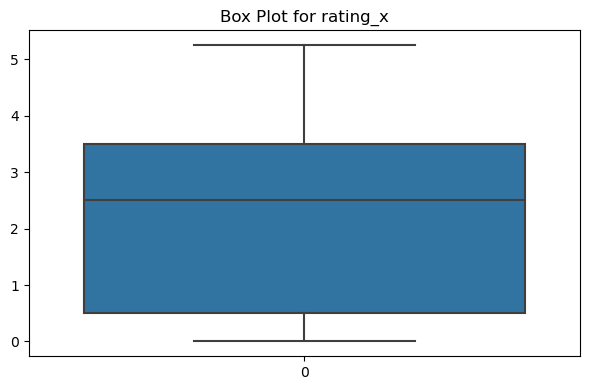

In [84]:
#Creating a box plot for the rating_x column
plt.figure(figsize=(6, 4))
sns.boxplot(df['rating_x'])
plt.title('Box Plot for rating_x')
plt.tight_layout()
plt.show()

There aren't any outliers in the box plot

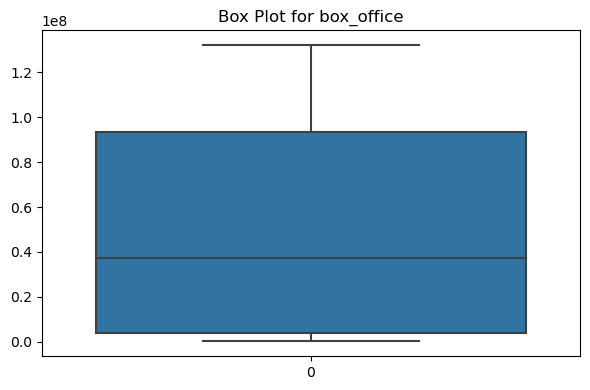

In [85]:
#Creating a box plot for the rating_x column
plt.figure(figsize=(6, 4))
sns.boxplot(df['box_office'])
plt.title('Box Plot for box_office')
plt.tight_layout()
plt.show()

There arent any outliers in the box office column

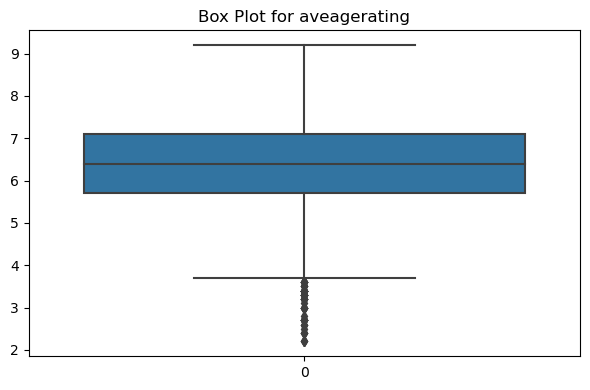

In [86]:
#Creating a box plot for the average rating column
plt.figure(figsize=(6, 4))
sns.boxplot(df['averagerating'])
plt.title('Box Plot for aveagerating')
plt.tight_layout()
plt.show()

There are outliers present in the average rating column. 

I have decided to leave the outliers because some movies can have an extremely high rating while others can have a really
low rating.

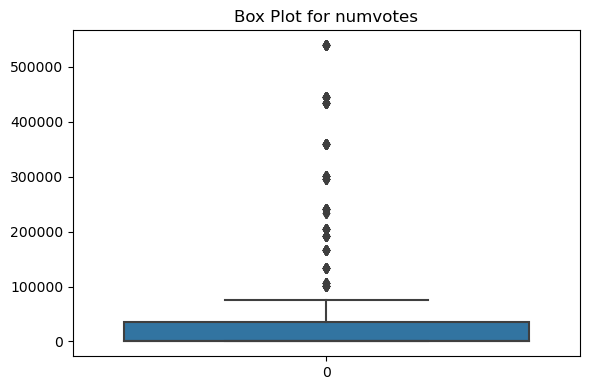

In [87]:
#Creating a box plot for the num votes column
plt.figure(figsize=(6, 4))
sns.boxplot(df['numvotes'])
plt.title('Box Plot for numvotes')
plt.tight_layout()
plt.show()

There are outliers present in the numvotes column.

I have decided to keep the outliers. 

Some movies have a lot of votes this can be due to the fact that more people watched it 

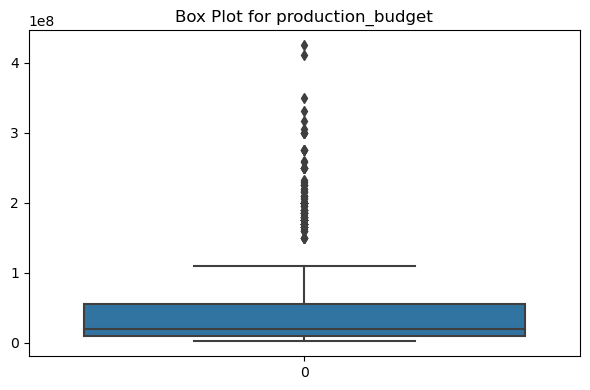

In [88]:
#Creating a box plot for the production budget column
plt.figure(figsize=(6, 4))
sns.boxplot(df['production_budget'])
plt.title('Box Plot for production_budget')
plt.tight_layout()
plt.show()

There are outliers present in the production budget column.
This is expected because every movie has different needs.

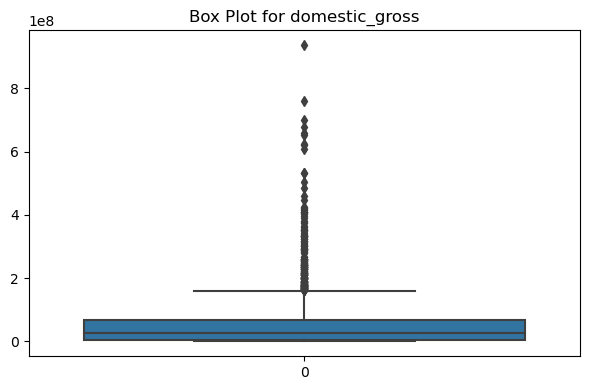

In [89]:
#Creating a box plot for the domestic_gross column
plt.figure(figsize=(6, 4))
sns.boxplot(df['domestic_gross'])
plt.title('Box Plot for domestic_gross')
plt.tight_layout()
plt.show()

There are outliers present in the domestic gross column.

I have decided to keep them.

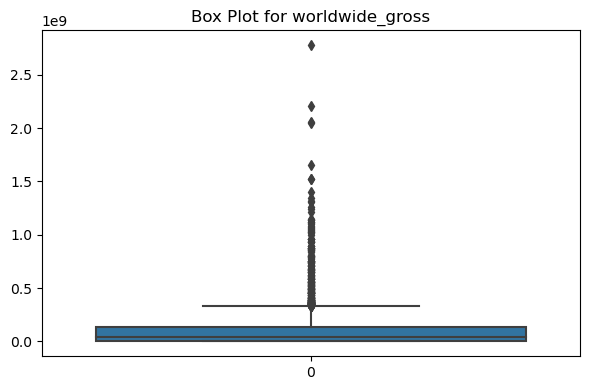

In [90]:
#Creating a box plot for the worldwide_gross column
plt.figure(figsize=(6, 4))
sns.boxplot(df['worldwide_gross'])
plt.title('Box Plot for worldwide_gross')
plt.tight_layout()
plt.show()

There are outliers present in the world wide gross column.

I have decided to keep them.

### 2.3 Univariate Anlaysis

#### 2.3a Histograms for numeric variables

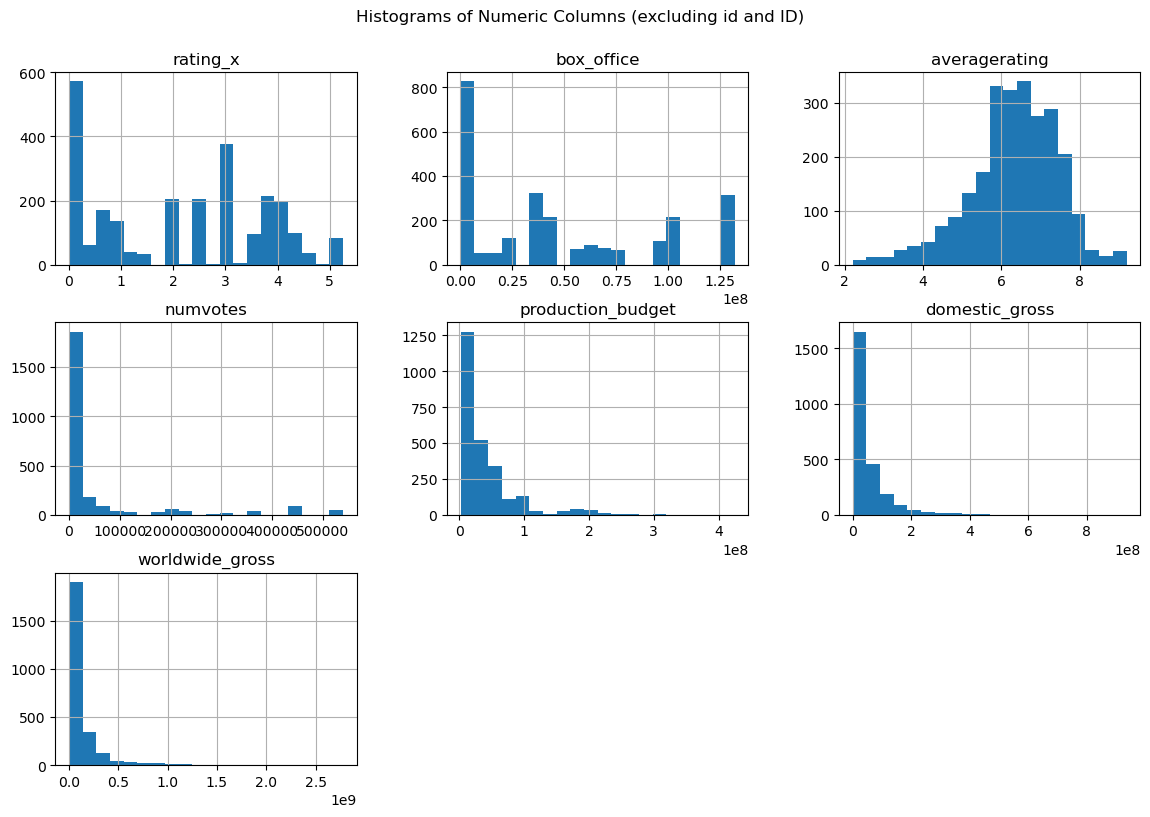

In [91]:
# Distribution of numerical variables excluding 'id' and 'ID'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = [col for col in numeric_columns if col not in ['id', 'ID','title_id']]

df[numeric_columns].hist(bins=20, figsize=(14, 9))
plt.suptitle('Histograms of Numeric Columns (excluding id and ID)', y=0.95)
plt.show()

The numvotes, production budget, domestic gross and world wide gross have a left skewed distribution 

The distribution of the average rating is slightly symmetrical

#### 2.3b Countplots for categorical variables

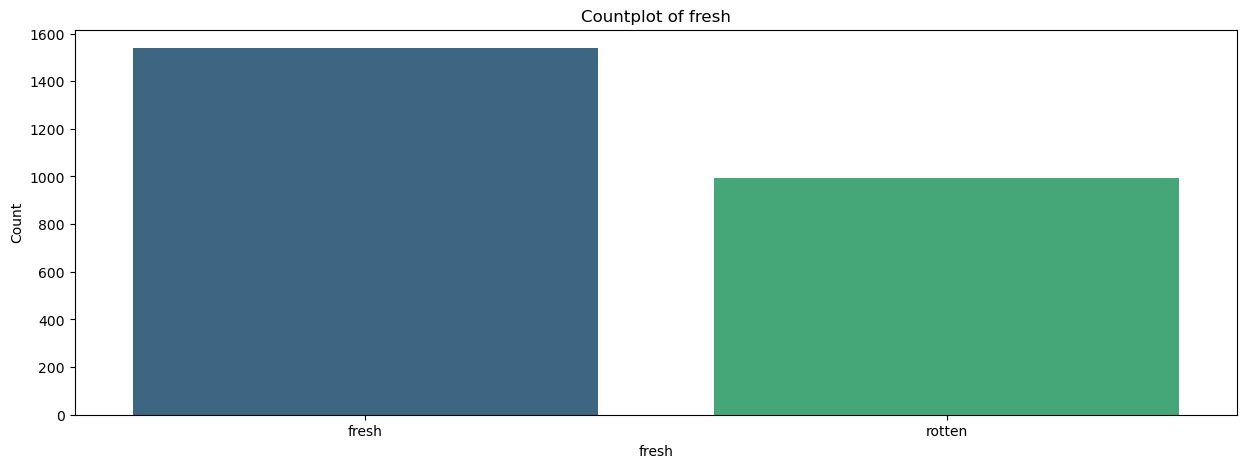

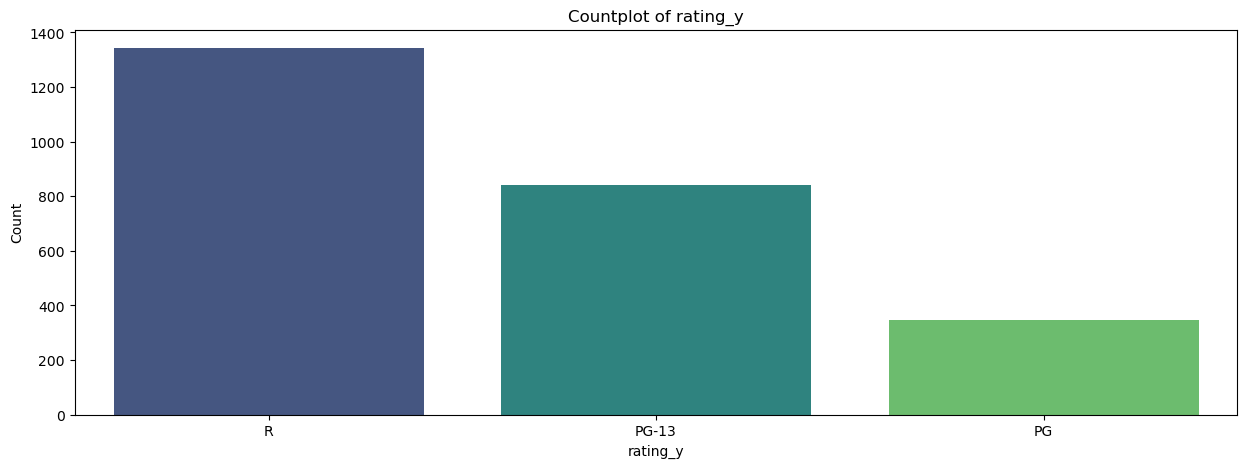

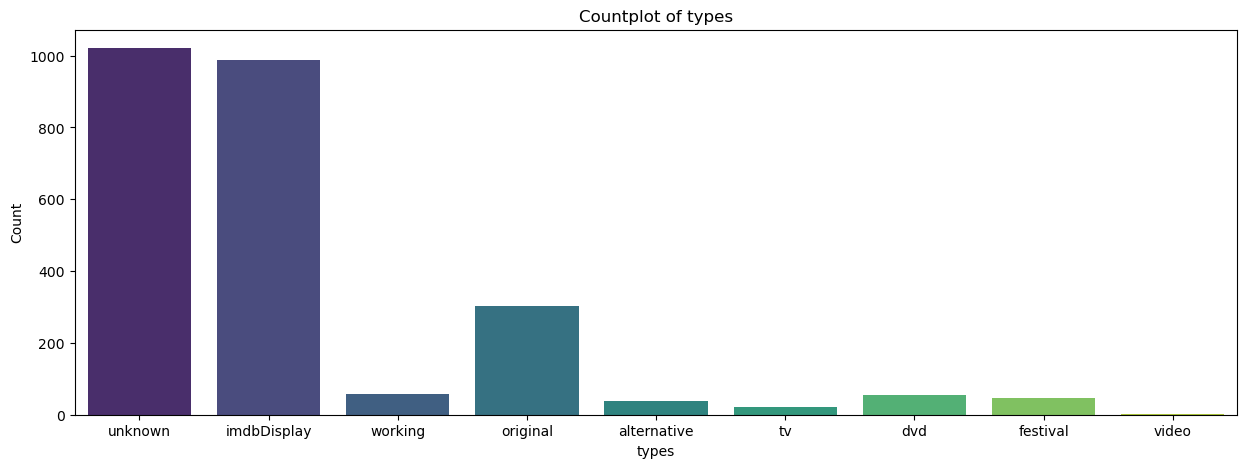

In [92]:
categorical_columns_of_interest = ['fresh', 'rating_y', 'types']

for column in categorical_columns_of_interest:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Majority of the movies were rated as fresh.

Majority of the movies were rated R.

Majority of the movies types were unknown and the majority of the known type were of type imdbDisplay

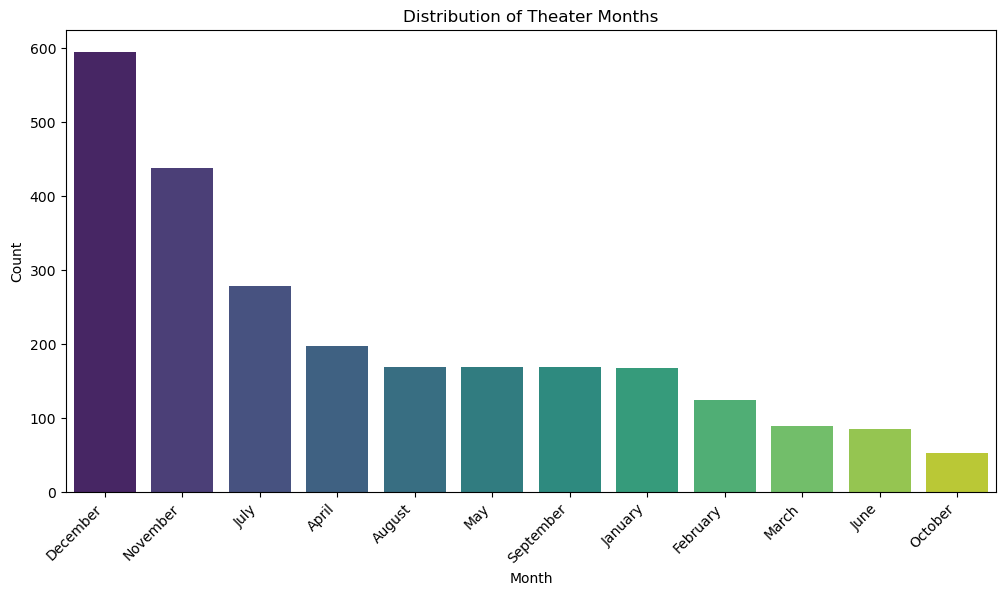

In [93]:
df['theater_date'] = pd.to_datetime(df['theater_date'])

# Extract the month from the 'theater_date' column
df['month'] = df['theater_date'].dt.month_name()

# Plot the distribution of months
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, palette='viridis', order=df['month'].value_counts().index)
plt.title('Distribution of Theater Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Majority of the theater dates were in the month of December

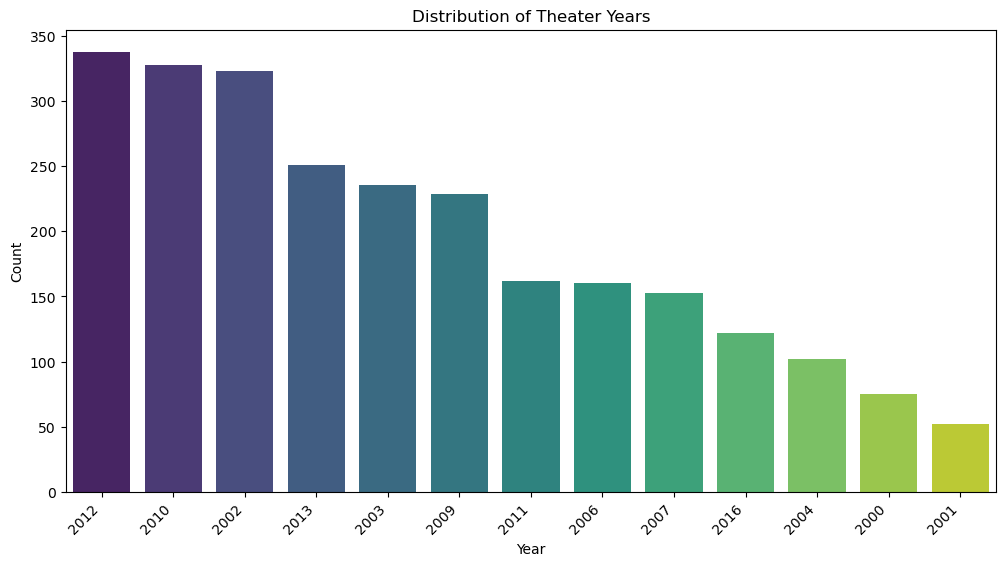

In [94]:
df['theater_date'] = pd.to_datetime(df['theater_date'])

# Extract the year from the 'theater_date' column
df['year'] = df['theater_date'].dt.year

# Plot the distribution of years
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df, palette='viridis', order=df['year'].value_counts().index)
plt.title('Distribution of Theater Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45, ha='right')
plt.show()

The number of movies released increased each year 

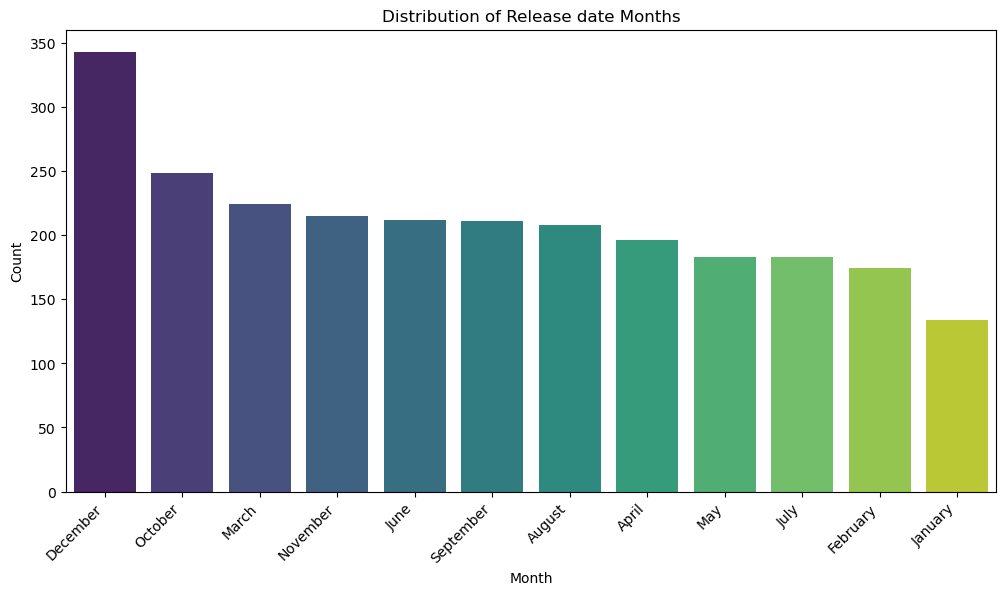

In [95]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the month from the 'theater_date' column
df['month'] = df['release_date'].dt.month_name()

# Plot the distribution of months
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df, palette='viridis', order=df['month'].value_counts().index)
plt.title('Distribution of Release date Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Majority of movies had their release dates in the month of December

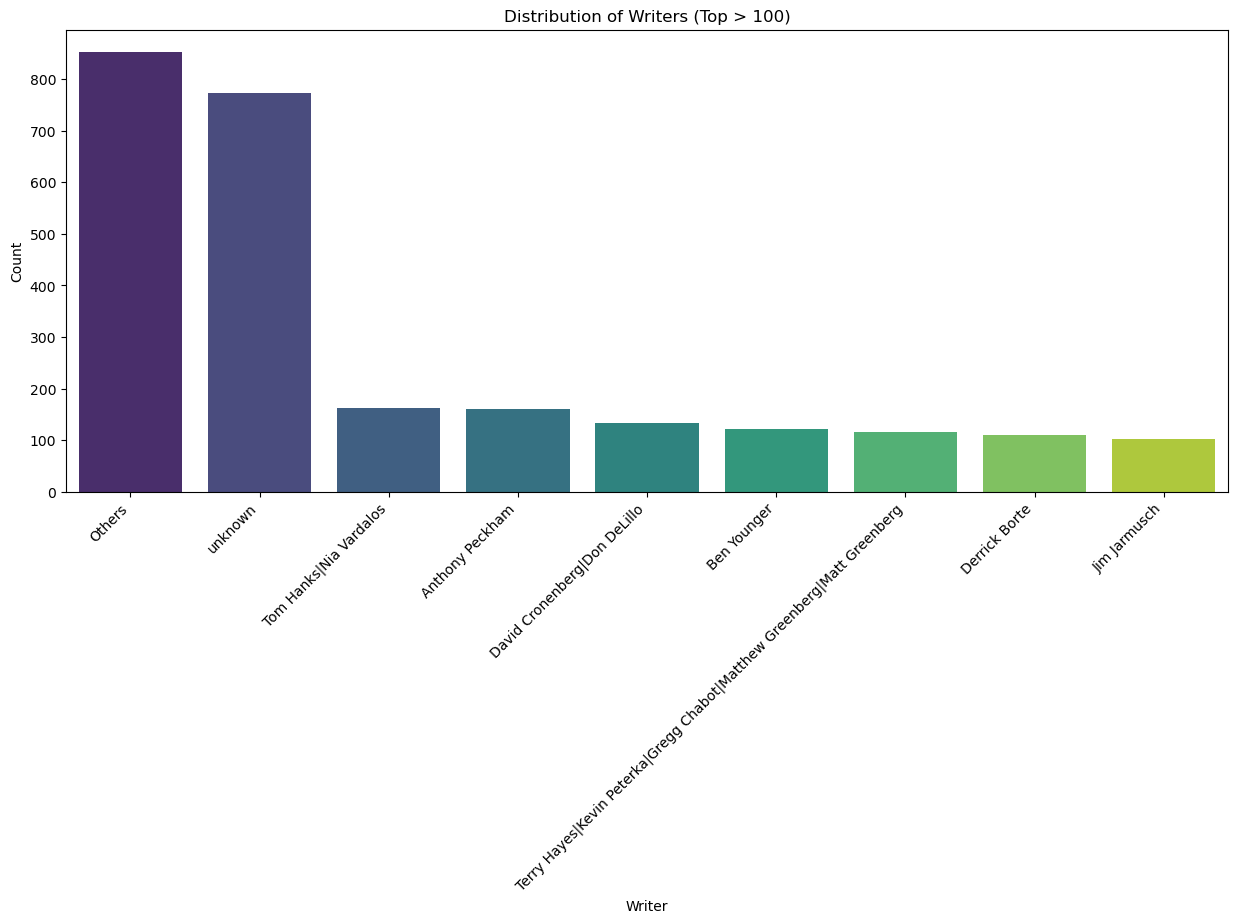

In [96]:
writer_counts = df['writer'].value_counts()
# Identify writers appearing more than 100 times
top_writers = writer_counts[writer_counts > 100].index

# Filter the dataframe for top writers and others
df_filtered = df['writer'].apply(lambda x: x if x in top_writers else 'Others')

# Plot the distribution of writer categories using a countplot
plt.figure(figsize=(15, 6))
sns.countplot(x=df_filtered, palette='viridis', order=df_filtered.value_counts().index)
plt.title('Distribution of Writers (Top > 100)')
plt.xlabel('Writer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

The plot shows the writers that appeared more than 500 times. 

Majority was unknown and the know writer that appeared the most was David Cronenberg|Don DeLillo

### 2.4 Bivariate Analysis

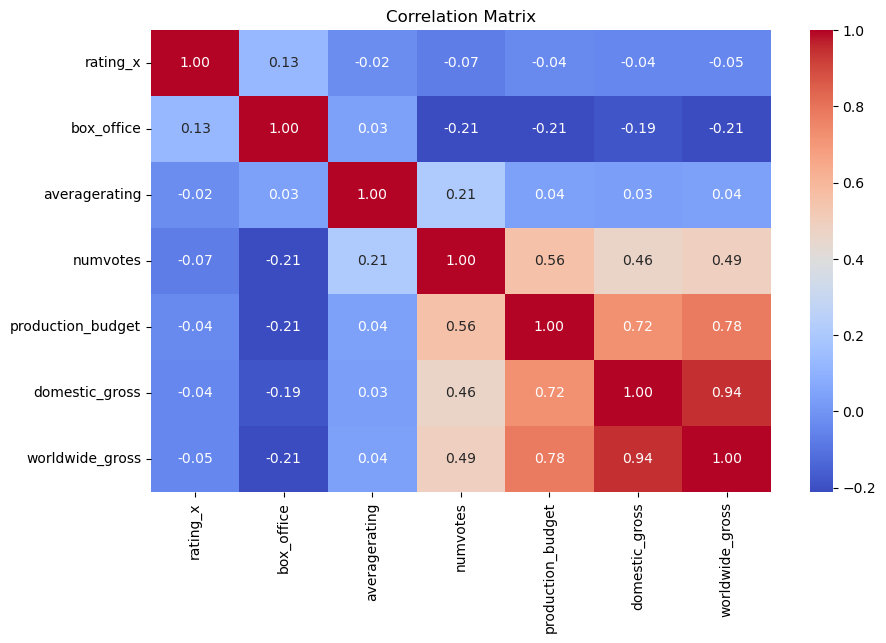

In [97]:
# Correlation matrix for numerical variables
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

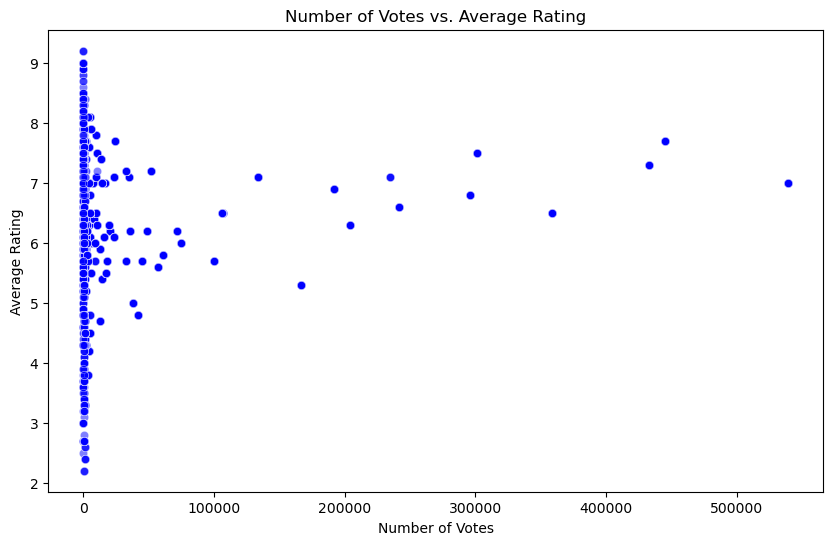

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='numvotes', y='averagerating', data=df, color='blue', alpha=0.5)
plt.title('Number of Votes vs. Average Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

There is no relationship between avergae voting and number of votes.

The more votes that a movie has does not intell that the rating will be good.

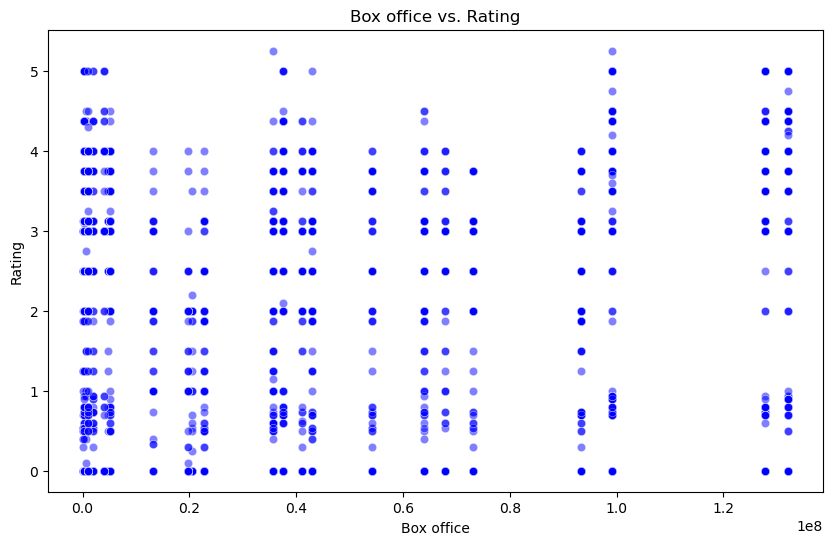

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='box_office', y='rating_x', data=df, color='blue', alpha=0.5)
plt.title('Box office vs. Rating')
plt.xlabel('Box office')
plt.ylabel('Rating')
plt.show()

The revenue that a movie generates does not have an effect on the rating. 

Higher revenue does not result into better ratings.

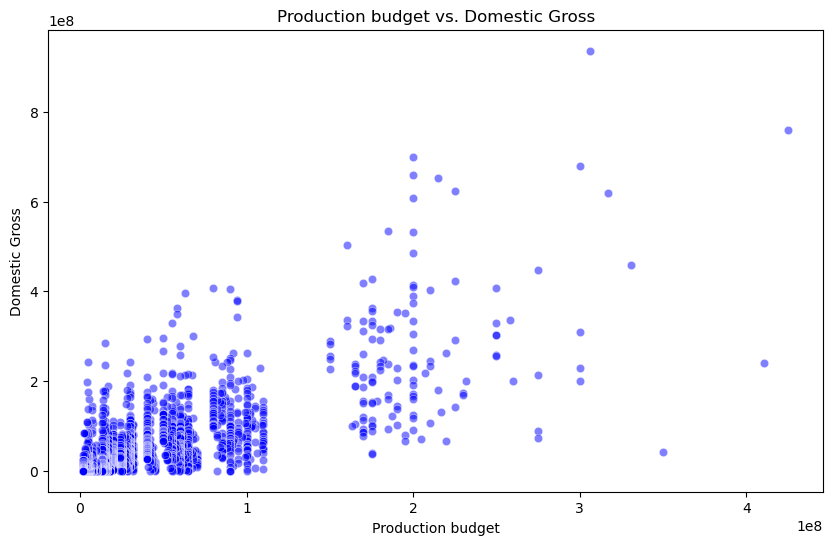

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross', data=df, color='blue', alpha=0.5)
plt.title('Production budget vs. Domestic Gross')
plt.xlabel('Production budget')
plt.ylabel('Domestic Gross')
plt.show()

There is no relationship between the production budget and domestic gross.

Spending more money does not intell that more money will be made.

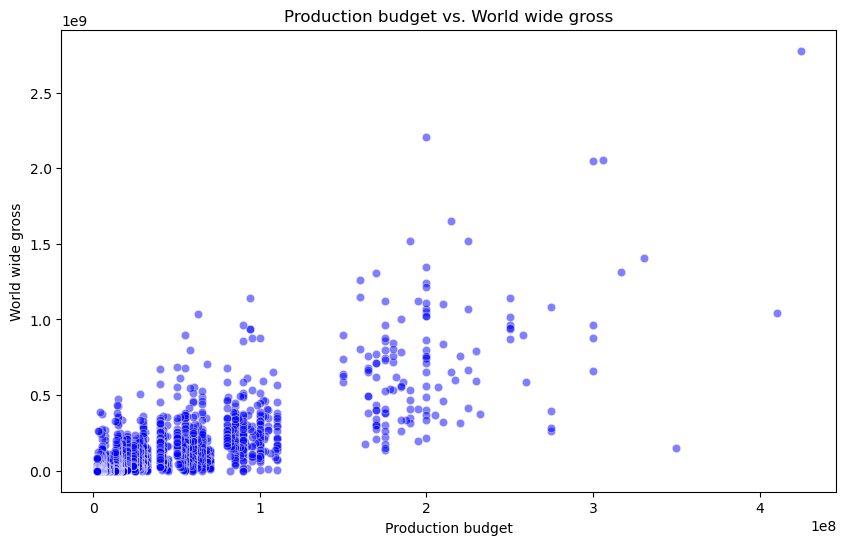

In [101]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=df, color='blue', alpha=0.5)
plt.title('Production budget vs. World wide gross')
plt.xlabel('Production budget')
plt.ylabel('World wide gross')
plt.show()

There is no relationship between the production budget and worldwide gross.

Spending more money does not intell that more money will be made.

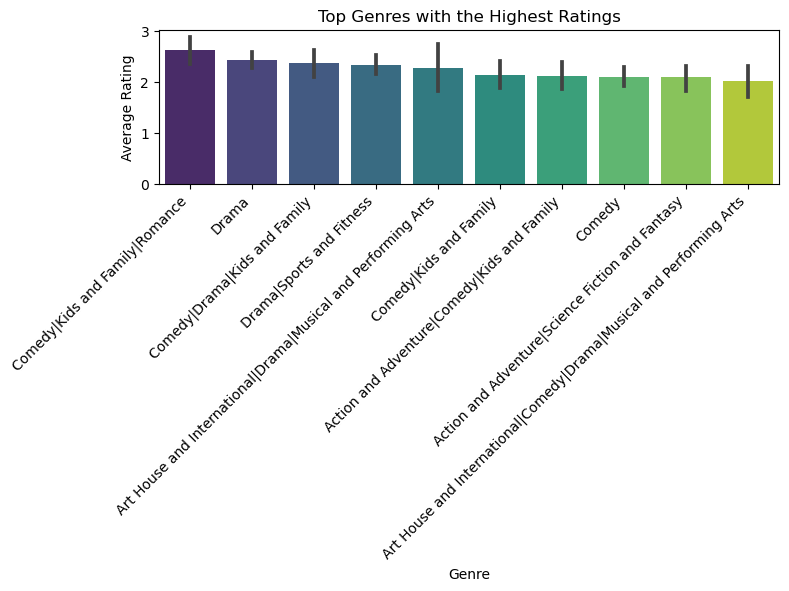

In [102]:
top_genres = df.groupby('genre')['rating_x'].mean().sort_values(ascending=False).head(10).index

# Filter the dataframe for the top genres
df_top_genres = df[df['genre'].isin(top_genres)]

# Plot the average ratings for the top genres
plt.figure(figsize=(8, 2))
sns.barplot(x='genre', y='rating_x', data=df_top_genres, order=top_genres, palette='viridis')
plt.title('Top Genres with the Highest Ratings')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [103]:
df['gross'] = df['domestic_gross'] + df['worldwide_gross']

# Display the first few rows of the DataFrame with the new 'gross' column
print(df[['domestic_gross', 'worldwide_gross', 'gross']].head())

   domestic_gross  worldwide_gross         gross
0     760507625.0     2.776345e+09  3.536853e+09
1     241063875.0     1.045664e+09  1.286728e+09
2      42762350.0     1.497624e+08  1.925247e+08
3     459005868.0     1.403014e+09  1.862020e+09
4     620181382.0     1.316722e+09  1.936903e+09


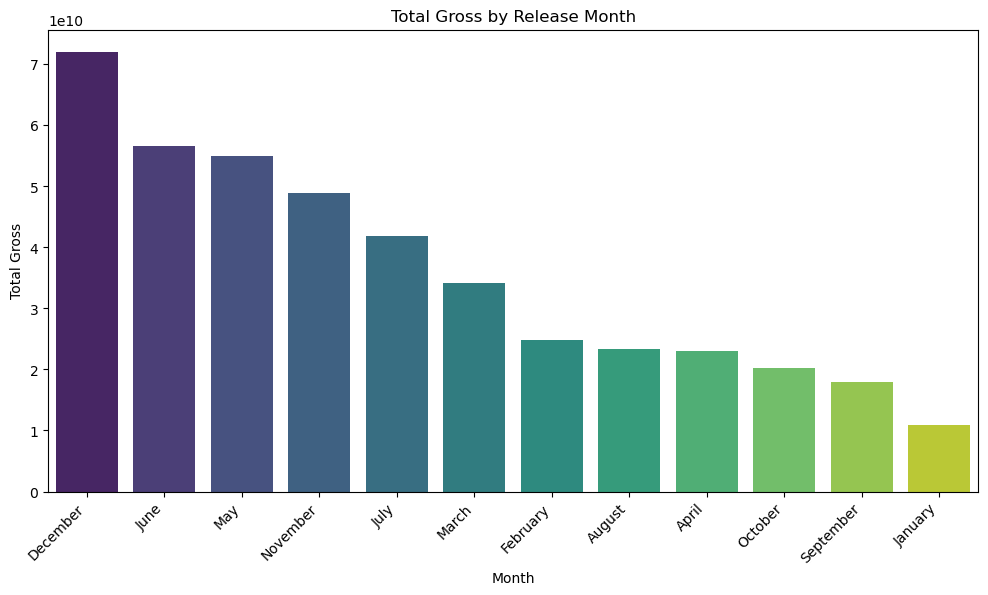

In [104]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['month'] = df['release_date'].dt.month_name()

# Calculate the total gross for each month
monthly_gross = df.groupby('month')['gross'].sum().sort_values(ascending=False)

# Plot the total gross for each month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_gross.index, y=monthly_gross.values, palette='viridis')
plt.title('Total Gross by Release Month')
plt.xlabel('Month')
plt.ylabel('Total Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

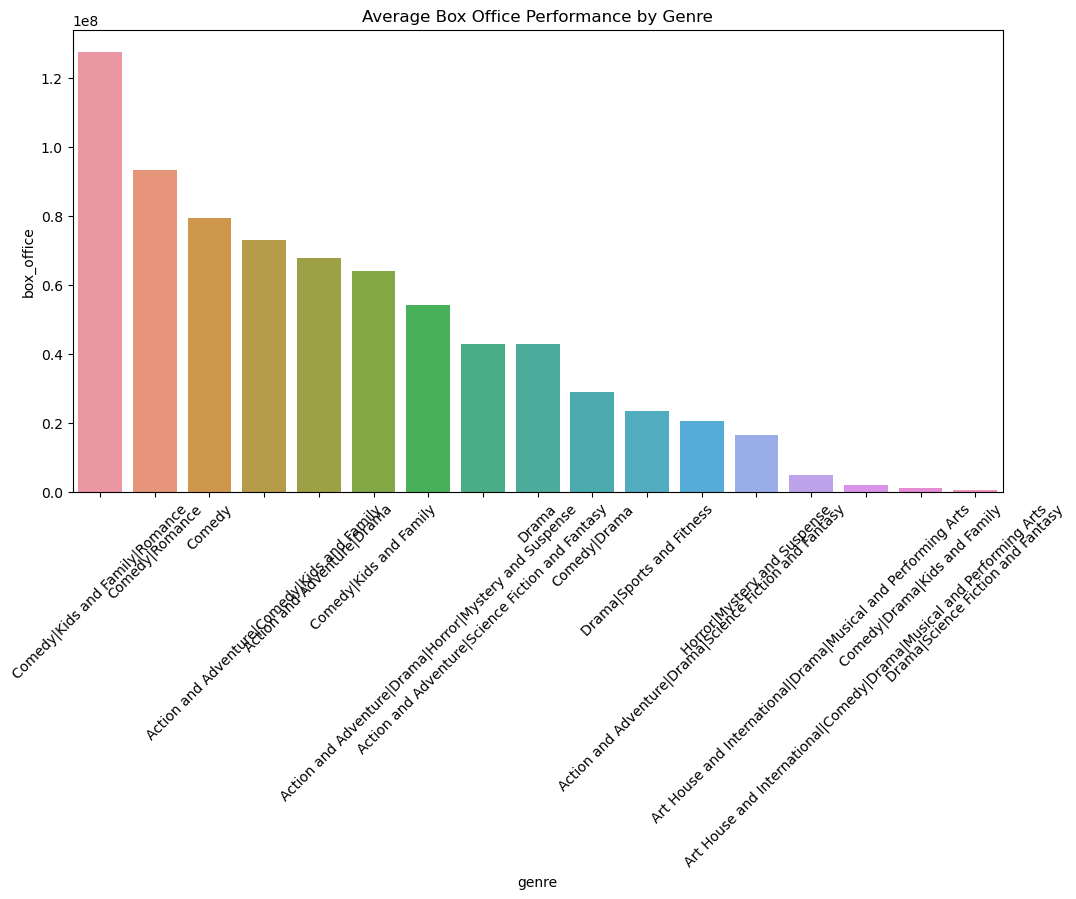

In [105]:
# Genre Analysis
plt.figure(figsize = (12,6))
genre_box_office = df.groupby('genre')['box_office'].mean().sort_values(ascending=False)
sns.barplot(x=genre_box_office.index, y=genre_box_office)
plt.xticks(rotation=45)
plt.title('Average Box Office Performance by Genre')
plt.show()

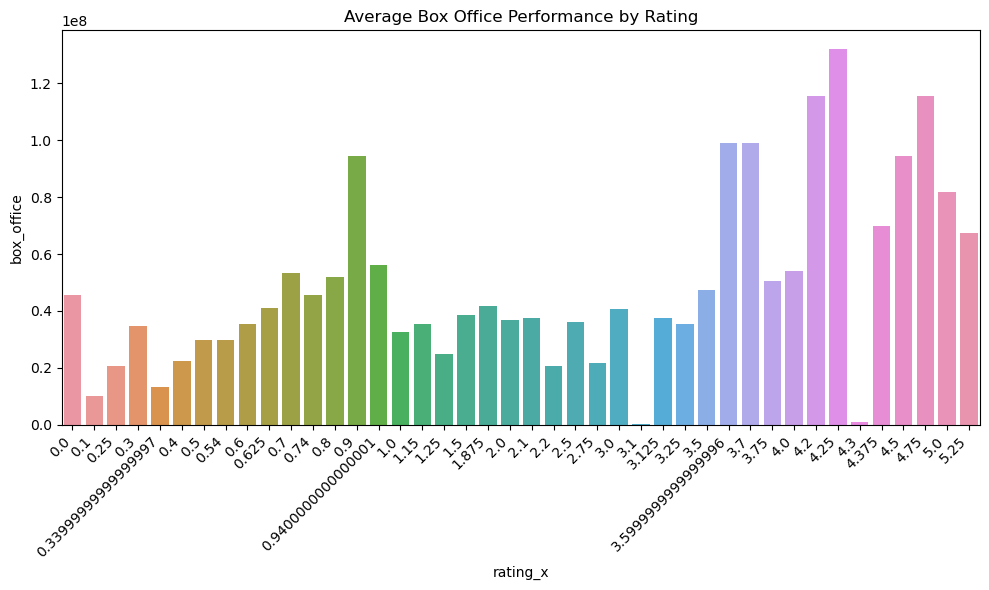

In [106]:
# Rating Analysis
plt.figure(figsize=(10, 6))
rating_box_office = df.groupby('rating_x')['box_office'].mean().sort_values(ascending=False)
# Rotate x-axis labels
sns.barplot(x=rating_box_office.index, y=rating_box_office)
plt.xticks(rotation=45, ha='right')  # Rotate labels to 45 degrees
plt.title('Average Box Office Performance by Rating')
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

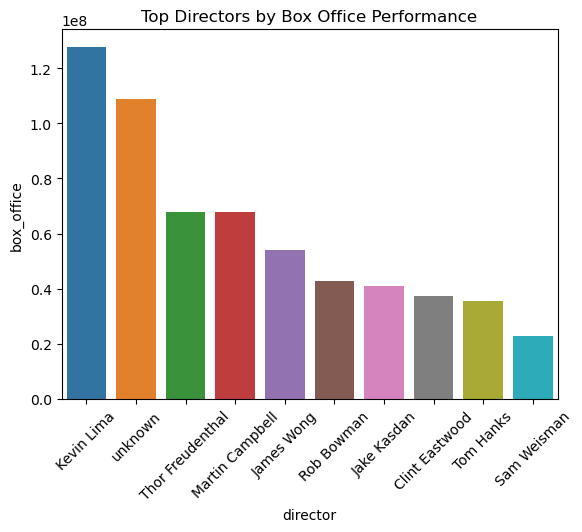

In [107]:
# Top Directors
top_directors = df.groupby('director')['box_office'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_directors.index, y=top_directors)
plt.xticks(rotation=45)
plt.title('Top Directors by Box Office Performance')
plt.show()

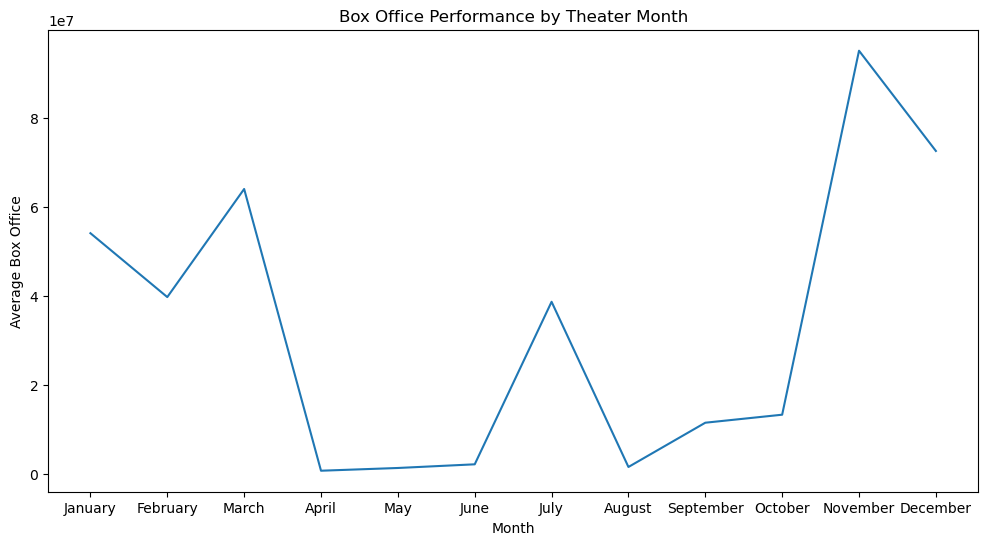

In [108]:
# Release date Analysis
df['theater_date'] = pd.to_datetime(df['theater_date'])

# Extract release month
df['theater_month'] = df['theater_date'].dt.month_name()

# Box office performance by release month
month_box_office = df.groupby('theater_month')['box_office'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Set figure size
plt.figure(figsize=(12, 6))

# Plot
sns.lineplot(x=month_box_office.index, y=month_box_office)
plt.title('Box Office Performance by Theater Month')
plt.xlabel('Month')
plt.ylabel('Average Box Office')
plt.show()

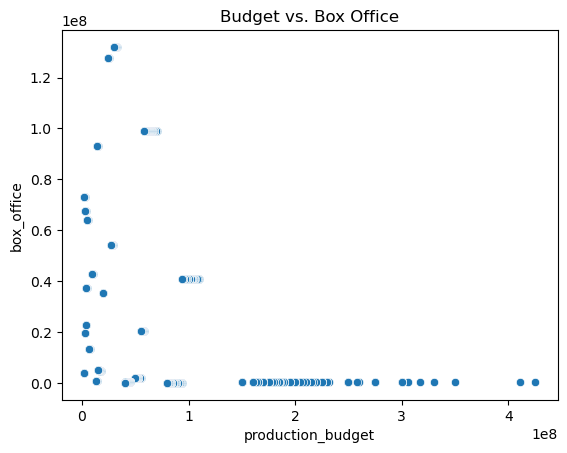

In [109]:
# Budget vs Box Office
sns.scatterplot(x='production_budget', y='box_office', data=df)
plt.title('Budget vs. Box Office')
plt.show()

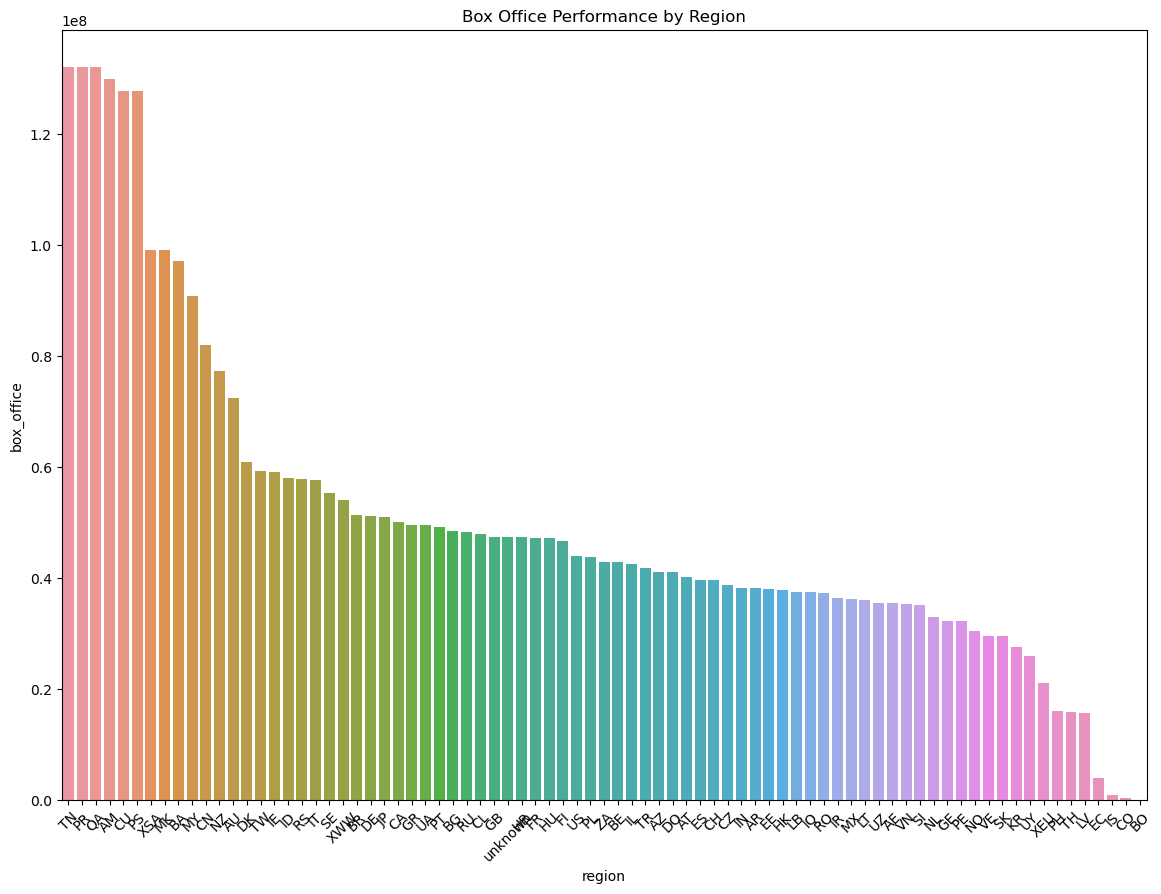

In [110]:
#Region language trend
plt.figure(figsize=(14, 10))
region_box_office = df.groupby('region')['box_office'].mean().sort_values(ascending=False)
sns.barplot(x=region_box_office.index, y=region_box_office)
plt.xticks(rotation=45)
plt.title('Box Office Performance by Region')
plt.show()

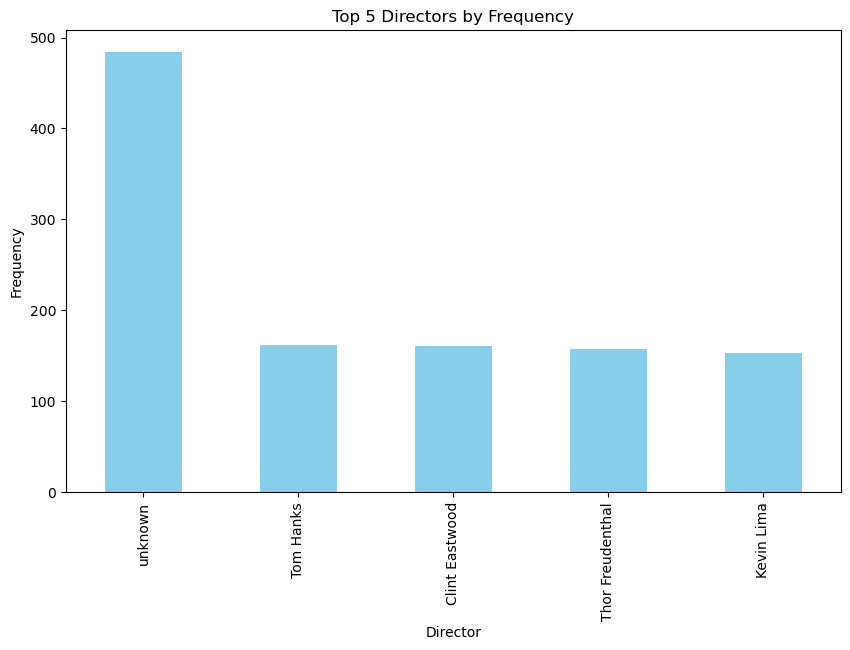

In [111]:
# Top 5 directors by frequency
top_directors_by_frequency = df['director'].value_counts().head(5)

# Plotting top directors by frequency
plt.figure(figsize=(10, 6))
top_directors_by_frequency.plot(kind='bar', color='skyblue')
plt.title('Top 5 Directors by Frequency')
plt.xlabel('Director')
plt.ylabel('Frequency')
plt.show()

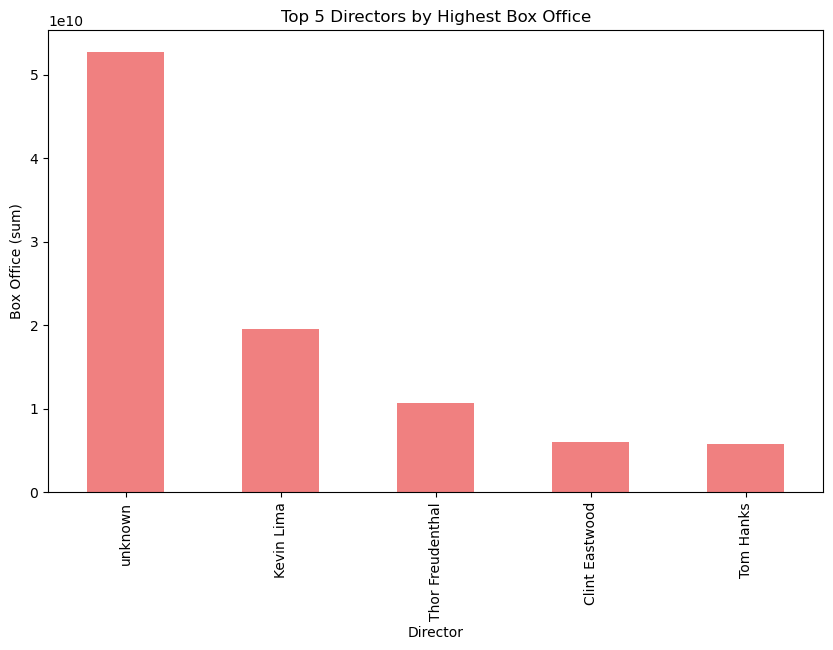

In [112]:
# Top 5 directors by highest box office
top_directors_by_box_office = df.groupby('director')['box_office'].sum().nlargest(5)

# Plotting top directors by box office
plt.figure(figsize=(10, 6))
top_directors_by_box_office.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Directors by Highest Box Office')
plt.xlabel('Director')
plt.ylabel('Box Office (sum)')
plt.show()

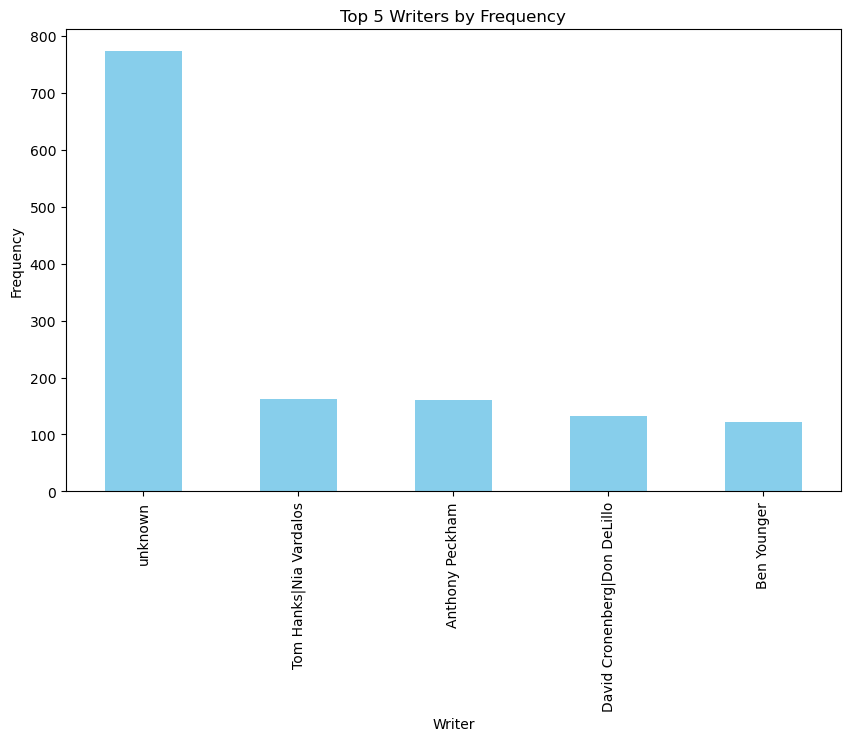

In [113]:
# Top 5 writers by frequency
top_writers_by_frequency = df['writer'].value_counts().head(5)

# Plotting top directors by frequency
plt.figure(figsize=(10, 6))
top_writers_by_frequency.plot(kind='bar', color='skyblue')
plt.title('Top 5 Writers by Frequency')
plt.xlabel('Writer')
plt.ylabel('Frequency')
plt.show()

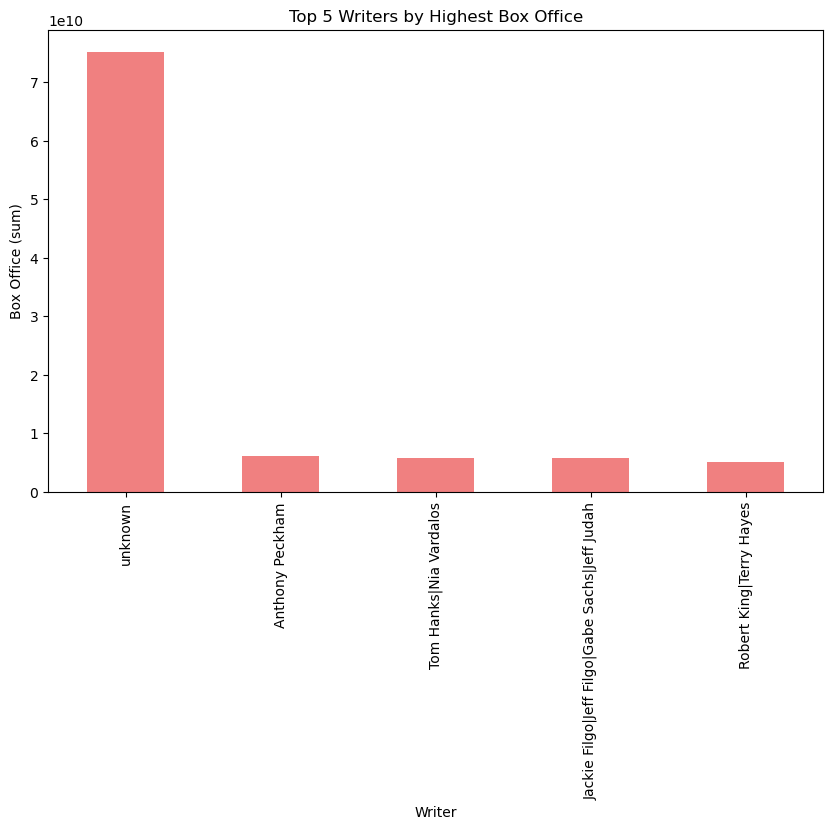

In [114]:
# Top 5 writers by highest box office
top_writers_by_box_office = df.groupby('writer')['box_office'].sum().nlargest(5)

# Plotting top writers by box office
plt.figure(figsize=(10, 6))
top_writers_by_box_office.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Writers by Highest Box Office')
plt.xlabel('Writer')
plt.ylabel('Box Office (sum)')
plt.show()

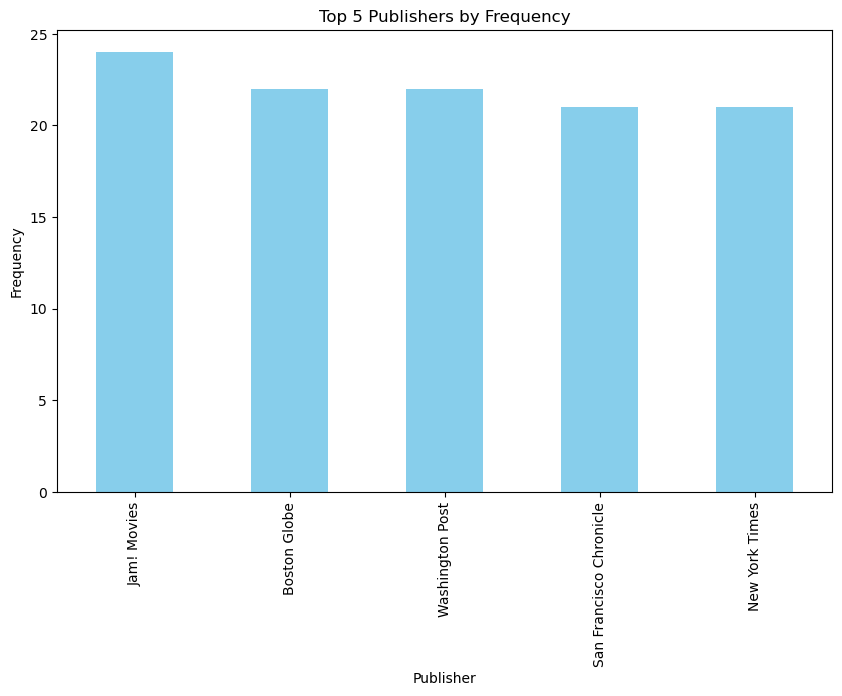

In [115]:
# Top 5 publisher by frequency
top_publisher_by_frequency = df['publisher'].value_counts().head(5)

# Plotting top directors by frequency
plt.figure(figsize=(10, 6))
top_publisher_by_frequency.plot(kind='bar', color='skyblue')
plt.title('Top 5 Publishers by Frequency')
plt.xlabel('Publisher')
plt.ylabel('Frequency')
plt.show()

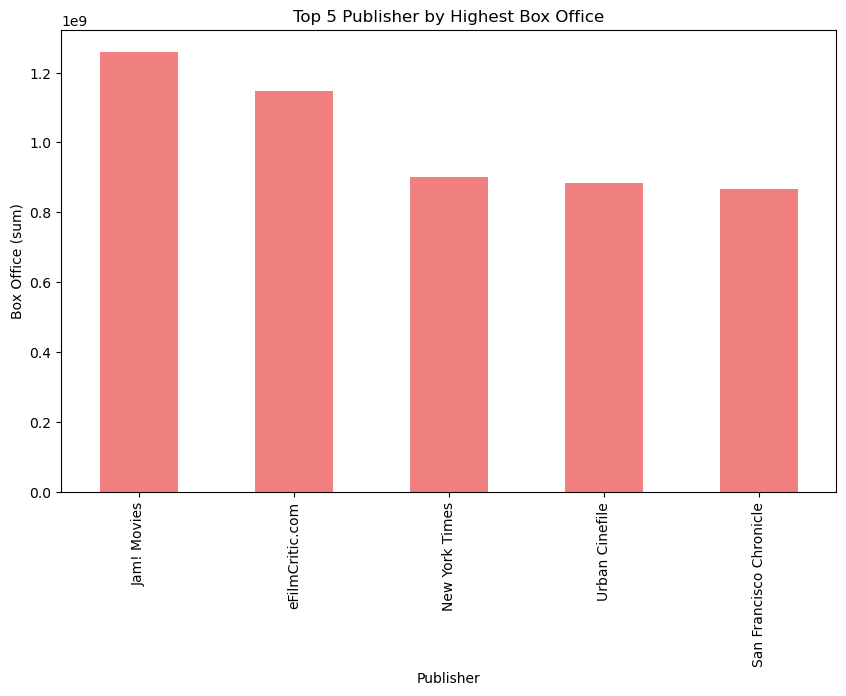

In [116]:
# Top 5 publisher by highest box office
top_publisher_by_box_office = df.groupby('publisher')['box_office'].sum().nlargest(5)

# Plotting top writers by box office
plt.figure(figsize=(10, 6))
top_publisher_by_box_office.plot(kind='bar', color='lightcoral')
plt.title('Top 5 Publisher by Highest Box Office')
plt.xlabel('Publisher')
plt.ylabel('Box Office (sum)')
plt.show()